# Lista de Exercícios 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from typing import List, Callable, Tuple
import math

### 1. Sabe-se que cada neurônio, de forma individual, estabelecerá um hiperplano de separação em um dado problema. Se uma quantidade relativamente grande de neurônios forem colocados em paralelo em uma única camada, tal rede seria capaz de separar problemas não-lineares? Justifique sua resposta.

Se ligarmos essa camada a uma camada de saída, sim. Se uma quantidade grande de neurônios forem colocados em paralelo em uma camada oculta, ligados à camada de saída, eles gerarão inúmeros hiperplanos que serão combinados pela camada de entrada. O hiperplano resultado teria um efeito serrilhado, mas seria capaz de separar problemas não lineares com uma certa precisão.

### 2. Qual a importância da escolha da função de ativação em redes neurais artificiais?

Além de inserir não linearidade, a função de ativação influencia muito no treinamento da rede. Isso porque as técnicas de treinamento utilizam gradiente descendente, que dependem da função ser diferenciável para seu funcionamento. A importância disso é tanta que uma das coisas que ajudou a criar redes mais profundas foi a adoção de outras funções de ativação além da sigmóide e tangente hiperbólica: RELU, ELU, Leaky-ELU, etc. Essas funções foram importantes para combater o vanishing gradient e exploding gradient, que aconteciam com maior força devido à natureza da sigmóide e tangente hiperbólica, que apresentam alta variância próximo do centro, mas variânica mínima nas bordas.

### 3. Qual o possível ganho, em comparação a um único neurônio, que se pode obter em uma rede neural artificial com duas camadas de neurônios?

Ela passa a ser capaz de resolver problemas não lineares. Além disso, poderá tratar de problemas multiclasses se sua camada de saída possuir mais de um neurônio.

### 4. Quais são as dificuldades em usar uma rede neural de múltiplas camadas?

A dificuldade está em seu treinamento. Mesmo depois da criação do algoritmo backpropagation, ainda existe muita dificuldade em se empilhar camadas. Isso porque o backpropagation funciona com derivadas parciais da saída da rede em relação aos neurônios. Quando esses neurônios estão em camadas muito distantes da saída, esse gradiente vai ficando cada vez maior, apresentando o problema conhecido como vanishing gradient, em que o gradiente é tão pequeno que as camadas iniciais mal tem seus pesos alterados.

### 5. Explique intuitivamente o que é a regra da cadeia.

A Regra da Cadeia indica como obter o coeficiente de variação (derivada) de uma função matemática composta por outra função. Essa regra dita que esse coeficiente de variação pode ser obtido ao calcular separadamente a derivada de cada função e multiplicar os resultados. Logo, pode-se dizer que o coeficiente de variação de uma função é dado pela multiplicação dos coeficientes de cada função de forma recursiva.

### 6. Explique matematicamente o que é a regra da cadeia.

In [8]:
%%latex
Dadas as funções $f(x)$ e $g(x)$, e considerando que $f(x)$ seja composta por $g(x)$ (ex: $f(x) = g(x)^2$), a regra da cadeia indica que a derivada de $f(x)$ é dada por:

<IPython.core.display.Latex object>

In [9]:
%%latex
$f'(x) = f'(g(x))g'(x)$

<IPython.core.display.Latex object>

Ou melhor:

In [10]:
%%latex
$\frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx}$

<IPython.core.display.Latex object>

Caso a composição seja de múltiplas funções, essa regra se aplica recursivamente.

### 7. Qual a importância das derivadas parciais para o processo de treinamento de uma rede neural artificial multicamadas?

As derivadas parciais permitem encontrar a variação de uma função com multiplas variáveis em relação a uma delas. Dessa forma, as derivadas parciais são utilizadas para derivar a função de erro em relação a cada um dos pesos, permitindo que seja encontrada a direção de alteração de cada peso para se minimizar o erro.

### 8. Quanto mais camadas uma rede neural artificial possuir, melhor o seu desempenho?

Não necessariamente. Primeiro porque uma rede profunda é mais difícil de treinar, precisando de uma quantidade maior de dados para um treinamento efetivo. Segundo que quanto maior a complexidade do modelo, mais suscetível ele está ao overfitting. Ou seja, uma rede muito profunda poderá até aprender os dados de treinamento, chegando até ao ponto de "decorá-los", mas não conseguirá criar uma boa generalização. Isso fará com que novos dados que a rede nunca viu sejam classificados com uma baixa precisão.

### 9. Dados quatro problemas diferentes, ilustrados na figura abaixo. Como você projetaria a arquitetura de uma rede neural artificial de modo a economizar neurônios utilizados na rede?

a) Esse problema é linearmente separável por um único hiperplano, o que permitiria que um único neurônio fosse capaz de resolver o problema.

b) Esse problema pode ser separado por múltiplos hiperplanos lineares. Então, seria necessário pelo menos um neurônio por hiperplano e uma camada de saída com um neurônio por classe. Essa camada de saída combinaria os hiperplanos e cada neurônio de saída indicaria a porcentagem de chance da entrada fazer parte de sua classe. Poderíamos, então, classificar a entrada com o neurônio de maior saída. Com essa separação, é provável que fosse necessário 5 neurônios na camada oculta (um para cada hiperplano) e 5 na camada de saída (um para cada classe).

c) Esse problema é linearmente separável por um único hiperplano, o que permitiria que um único neurônio fosse capaz de resolver o problema.

d) Esse problema já apresenta regiões convexas para separar as classes. Logo, seria necessário ou uma quantidade maior de neurônios numa única camada oculta, para que vários hiperplanos sejam traçados e combinados na camada de saída, ou duas camadas ocultas, o que tornaria capaz de produzir regiões convexas de separação. A quantidade de neurônios na camada de saída continua sendo 5, como na (b).

### 10. Qual a relação entre gradiente descendente, gradiente descendente estocástico e mínimos locais e globais?

O Gradiente Descendente é uma técnica de otimização que visa encontrar um valor mínimo (ou máximo) de uma função desconhecida através do cálculo da derivada do erro com base nos exemplos de entrada e saída (dataset). O problema dessa técnica é que ela tende a ficar presa em mínimos locais, visto que a derivada tende ao zero quando um é alcançado. Para evitar que isso aconteça, utiliza-se o Gradiente Descendente Estocástico. Ao invés de considerar todos os exemplos de entrada e saída para se calcular a derivada, utiliza-se apenas um exemplo por vez, selecionado em ordem aleatória. Dessa forma, cada exemplo representa uma função diferente, a qual terá mínimos diferentes. Isso evita que a otimização fique presa em mínimos locais, mas deixa a otimização muito mais lenta, podendo até mesmo não convergir. Por isso, foi criada a otimização com Mini Batch. Ela utiliza de estocasticidade, mas calcula o gradiente com base em um batch de exemplos. Isso deixa a otimização mais estável e mais rápida, enquanto evita os mínimos locais. Mas cria um novo hiperparâmetro: o tamanho do mini batch.

### 12. Implemente o algoritmo backpropagation em linguagem python e apresente um notebook correspondente com os comentários. Por fim, mostre o gráfico de erro em relação às épocas para o conjunto de dados do exercício anterior;

In [2]:
def shuffle(a: np.ndarray, b: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))


def sigmoid_derivative(x: float) -> float:
    return sigmoid(x) * (1 - sigmoid(x))


class MultilayerPerceptron:
    def __init__(self, learning_rate: float, initial_weights: List[np.ndarray] = None, initial_bias: List[float] = None,
                 n_neurons_per_layer: List[float] = None,
                 activation_function: Callable[[float], float] = sigmoid,
                 derived_activation_function: Callable[[float], float] = sigmoid_derivative,
                 batch_size=None, n_epochs=100):
        if n_neurons_per_layer is not None:
            self._weights: List[np.ndarray] = []
            self._bias: List[float] = []
            for n, m in zip(n_neurons_per_layer[0:-1], n_neurons_per_layer[1:]):
                self._weights.append(np.random.randn(m, n).astype(np.float32) * np.sqrt(2.0/(m)))
                self._bias.append(0)
        else:
            if len(initial_bias) != len(initial_weights):
                raise ValueError(
                    "Deve haver um bias e uma lista de pesos por camada, sendo que ambos tenham o mesmo tamanho.")
            self._weights: List[np.ndarray] = initial_weights
            self._bias: List[float] = initial_bias

        self._learning_rate: float = learning_rate
        self._activation_function: Callable[[np.ndarray], np.ndarray] = np.vectorize(activation_function)
        self._derived_activation_function: Callable[[np.ndarray], np.ndarray] = np.vectorize(
            derived_activation_function)
        self._batch_size = batch_size
        self._n_epochs = n_epochs

    def _prepend_bias(self, x: np.ndarray) -> np.ndarray:
        return np.insert(x, 0, values=1, axis=0)

    def _feed_forward(self, x: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        layer_input = self._prepend_bias(x)
        layer_outputs = []
        layer_inner_outputs = []  # Antes da função de ativação
        for layer_weights, layer_bias in zip(self._weights, self._bias):
            # Adiciona o bias
            layer_weights_with_bias = np.insert(layer_weights, 0, values=layer_bias, axis=1)
            # Calcula saída dos neurônios antes da função de ativação
            layer_inner_output = (layer_input * layer_weights_with_bias).sum(axis=1)
            layer_inner_outputs.append(layer_inner_output)
            # Aplica a função de ativação
            layer_output = self._activation_function(layer_inner_output)
            layer_outputs.append(layer_output)
            # Passa a saída dessa camada como entrada para a próxima
            layer_input = self._prepend_bias(layer_output)

        return layer_outputs, layer_inner_outputs

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.atleast_2d(X)
        output = []
        for x in X:
            output.append(self._feed_forward(x)[0][-1])
        return np.array(output)

    def _step(self, X: np.ndarray, Y: np.ndarray) -> float:
        updated_weights: List[np.ndarray] = [np.copy(neuron_weights) for neuron_weights in self._weights]
        updated_bias = self._bias[:]

        errors = []

        for x, y in zip(X, Y):
            layer_outputs, layer_inner_outputs = self._feed_forward(x)
            errors.append((0.5 * (y - layer_outputs[-1]) ** 2).sum())

            layer_inputs = [x] + layer_outputs

            delta = None
            for i in range(len(self._bias)):
                layer_inner_output = layer_inner_outputs[-i - 1]
                layer_output = layer_outputs[-i - 1]
                layer_input = layer_inputs[-i - 2]
                input_weights = np.array(self._weights[-i - 1])
                output_weights = np.array(self._weights[-i]) if i > 0 else None

                # Derivada do erro pela saída (após função de ativação)
                error_derived_by_layer_output = layer_output - y if i == 0 else (output_weights.T * delta).sum(axis=1)
                # Derivada da saída (após função de ativação) pela saída (antes da função de ativação)
                layer_output_derived_by_layer_inner_output = self._derived_activation_function(layer_inner_output)
                delta = error_derived_by_layer_output * layer_output_derived_by_layer_inner_output
                # Derivada da saída (antes da função de ativação) pelo peso
                layer_inner_output_derived_by_weight = (np.ones(input_weights.shape) * layer_input).T
                # Derivada da saída (antes da função de ativação) pelo bias
                layer_inner_output_derived_by_bias = 1

                error_derived_by_weights = (delta * layer_inner_output_derived_by_weight).T
                error_derived_by_bias = (delta * layer_inner_output_derived_by_bias).sum()

                updated_weights[-i - 1] = updated_weights[-i - 1] - self._learning_rate * error_derived_by_weights
                updated_bias[-i - 1] = updated_bias[-i - 1] - self._learning_rate * error_derived_by_bias

        self._weights = updated_weights
        self._bias = updated_bias

        return sum(errors) / float(len(errors))

    def fit(self, X: np.ndarray, Y: np.ndarray):
        X = np.atleast_2d(X)
        Y = np.atleast_2d(Y)

        errors_history = []
        for epoch in range(self._n_epochs):
            errors = []
            X_train, Y_train = shuffle(X, Y)
            minibatch_size = min(self._batch_size, len(X_train)) if self._batch_size else len(X_train)

            for i in range(0, X_train.shape[0], minibatch_size):
                # Get pair of (X, y) of the current minibatch/chunk
                X_train_mini = X_train[i:i + minibatch_size]
                Y_train_mini = Y_train[i:i + minibatch_size]
                errors.append(self._step(X_train_mini, Y_train_mini))

            epoch_error = sum(errors) / float(len(errors))
            errors_history.append(epoch_error)

        return errors_history


#### Rodando para os dados da questão 11

In [47]:
model = MultilayerPerceptron(learning_rate=0.5, initial_weights=[np.array([[0.15, 0.2], [0.25, 0.3]]), np.array([[0.4, 0.45], [0.5, 0.55]])], initial_bias=[0.35, 0.6], n_epochs=10000)

In [48]:
X = np.array([[0.05, 0.1]])
Y = np.array([[0.01, 0.99]])

In [49]:
errors = model.fit(X, Y)

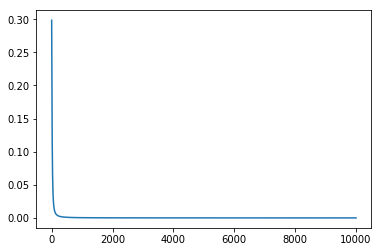

In [50]:
plt.plot(np.arange(0, len(errors)), errors)

#### Rodando para os dados de diagnóstico de fertilidade

In [51]:
df = pd.read_csv('Diagnostico_fertilidade.csv', sep=';')

In [52]:
df.head()

,season,age,childish_diseases,trauma,surgical_intervention,high_fevers_last_year,alcool,smoking,sitting,diag
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [53]:
df['diag'] = df.diag.apply(lambda diag: 0 if diag == 'N' else 1)

In [54]:
df.head()

,season,age,childish_diseases,trauma,surgical_intervention,high_fevers_last_year,alcool,smoking,sitting,diag
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [55]:
X = df[['season', 'age', 'childish_diseases', 'trauma', 'surgical_intervention', 'high_fevers_last_year', 'alcool', 'smoking', 'sitting']].values
Y = df[['diag']].values

In [56]:
Y.shape

(100, 1)

In [57]:
n_neurons_per_layer = [9, 9, 1]

In [58]:
model = MultilayerPerceptron(learning_rate=0.01, n_neurons_per_layer=n_neurons_per_layer, n_epochs=1000, batch_size=20)

In [59]:
errors = model.fit(X, Y)

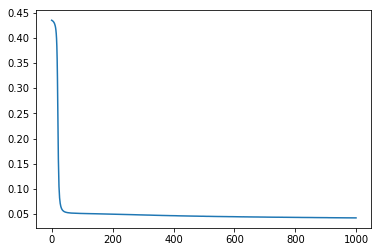

0.042515669357148789

In [60]:
plt.plot(np.arange(0, len(errors)), errors)
plt.show()
errors[-1]

In [73]:
((model.predict(X) > 0.4).astype(int) == Y).sum() / len(Y)

0.91000000000000003